In [70]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor



import matplotlib.pyplot as plt

In [27]:
train_df = pd.read_csv("1_1ms_350W.csv", index_col=False)
train_df.head()
speed_list = [1.02 for _ in range(3648)]
power_list = [350 for _ in range(3648)]
train_df.insert(loc=0, column='Power', value=power_list)
train_df.insert(loc=0, column='Speed', value=speed_list)
train_df.head()

,Speed,Power,X_Coord,Y_Coord,Z_Coord,Temp
0,1.02,350,0.18,-0.21,0.0,0.00014
1,1.02,350,0.15,-0.21,0.0,0.00014
2,1.02,350,0.12,-0.21,0.0,0.00014
3,1.02,350,0.09,-0.21,0.0,0.00014
4,1.02,350,0.06,-0.21,0.0,0.00015


In [38]:
val_df = pd.read_csv("1_05ms_325W.csv", index_col=False)
val_df.head()
speed_list = [1.05 for _ in range(3648)]
power_list = [325 for _ in range(3648)]
val_df.insert(loc=0, column='Power', value=power_list)
val_df.insert(loc=0, column='Speed', value=speed_list)
val_df.head()

,Speed,Power,X_Coord,Y_Coord,Z_Coord,Temp
0,1.05,325,0.18,-0.21,0.0,0.00013
1,1.05,325,0.15,-0.21,0.0,0.00013
2,1.05,325,0.12,-0.21,0.0,0.00013
3,1.05,325,0.09,-0.21,0.0,0.00014
4,1.05,325,0.06,-0.21,0.0,0.00015


In [39]:
train_x = train_df.drop(columns=["Temp"])
train_x.head()
train_y = train_df["Temp"]
train_y.head()

0    0.00014
1    0.00014
2    0.00014
3    0.00014
4    0.00015
Name: Temp, dtype: float64

In [40]:
val_x = val_df.drop(columns=["Temp"])
val_x.head()
val_y = val_df["Temp"]
val_y.head()

0    0.00013
1    0.00013
2    0.00013
3    0.00014
4    0.00015
Name: Temp, dtype: float64

In [46]:
val_x.head()

,Speed,Power,X_Coord,Y_Coord,Z_Coord
0,1.05,325,0.18,-0.21,0.0
1,1.05,325,0.15,-0.21,0.0
2,1.05,325,0.12,-0.21,0.0
3,1.05,325,0.09,-0.21,0.0
4,1.05,325,0.06,-0.21,0.0


In [43]:
CatBoostRegrModel = CatBoostRegressor(iterations=300, learning_rate=0.1, 
                                      depth=4,logging_level="Silent", allow_const_label = True)
CatBoostRegrModel.fit(train_x, train_y)


In [54]:
y_pred = CatBoostRegrModel.predict(val_x)
y_pred

array([0.00035603, 0.00035603, 0.00035603, ..., 0.01100906, 0.01098228,
       0.01097454])

In [55]:
r2_score(y_pred, val_y)

0.978232421801977

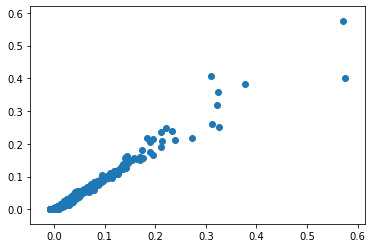

In [58]:
plt.scatter(y_pred, val_y)

In [67]:
df = pd.read_csv("full_temperature.csv", index_col=False)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,X_Coord,Y_Coord,Z_Coord,Temp,speed,power
0,0.18,-0.21,0.0,0.00008,0.6,100
1,0.15,-0.21,0.0,0.00008,0.6,100
2,0.12,-0.21,0.0,0.00008,0.6,100
3,0.09,-0.21,0.0,0.00009,0.6,100
4,0.06,-0.21,0.0,0.00010,0.6,100


In [88]:
X = df.drop(columns=["Temp"])
X.head()
Y = df["Temp"]
Y.head()


CatBoostRegrModel = CatBoostRegressor(iterations=None,
                        learning_rate=None,
                        depth=None, 
                                      logging_level="Silent")
CatBoostRegrModel.fit(X_train, y_train)

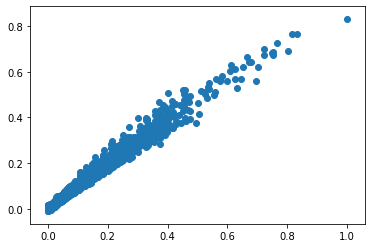

In [89]:
y_pred = CatBoostRegrModel.predict(X_test)
plt.scatter(y_test, y_pred)

In [90]:
r2_score(y_test, y_pred)

0.9906824329905597

/Users/shiyuliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9949878243750898

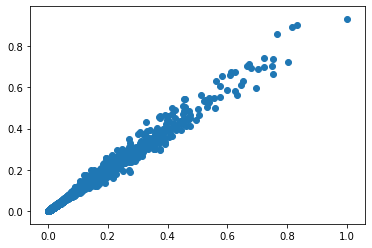

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
plt.scatter(y_test, y_pred)
r2_score(y_test, y_pred)

In [ ]:
##################################################
##################################################
##################################################
##################################################
##################################################

In [385]:
train_file = "temp_train.csv"
test_file = "temp_test.csv"

In [386]:
df_train = pd.read_csv(train_file, index_col=False)
df_train.drop(columns=["Unnamed: 0"], inplace=True)
df_train.head()

,X_Coord,Y_Coord,Z_Coord,Temp,speed,power
0,0.18,-0.21,0.0,0.00008,0.6,125
1,0.15,-0.21,0.0,0.00008,0.6,125
2,0.12,-0.21,0.0,0.00008,0.6,125
3,0.09,-0.21,0.0,0.00009,0.6,125
4,0.06,-0.21,0.0,0.00011,0.6,125


In [331]:
X_train = df_train.drop(columns=["Temp"])
X_train.shape
y_train = df_train["Temp"]
y_train.shape

(667584,)

In [332]:
df_test = pd.read_csv(test_file, index_col=False)
df_test.drop(columns=["Unnamed: 0"], inplace=True)
df_test.head()
X_test = df_test.drop(columns=["Temp"])
X_test.shape
y_test = df_test["Temp"]
y_test.shape

(116736,)

In [333]:
df_test.head()

,X_Coord,Y_Coord,Z_Coord,Temp,speed,power
0,0.18,-0.21,0.0,0.00008,0.6,100
1,0.15,-0.21,0.0,0.00008,0.6,100
2,0.12,-0.21,0.0,0.00008,0.6,100
3,0.09,-0.21,0.0,0.00009,0.6,100
4,0.06,-0.21,0.0,0.00010,0.6,100


In [339]:
CatBoostRegrModel = CatBoostRegressor(iterations=800,
                                        learning_rate=0.1,
                                        depth=14, 
                                        logging_level="Silent")
CatBoostRegrModel.fit(X_train, y_train)

min =  -0.0007678539421510371
max =  1.0


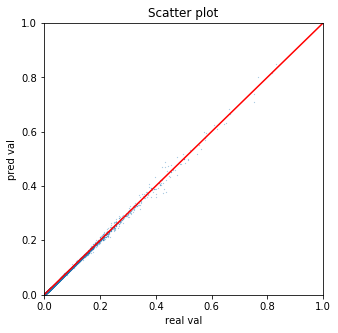

0.9992119431819301

In [340]:
y_pred = CatBoostRegrModel.predict(X_test)
scatter_plot(y_test, y_pred)
r2_score(y_test, y_pred, 0.3)

In [341]:
import pickle
filename = 'cat_1a.sav'
pickle.dump(CatBoostRegrModel, open(filename, 'wb'))

### Test validation on temperature.

In [387]:
model_val = pickle.load(open("cat_1a.sav", 'rb'))

In [388]:
df1_cv = pd.read_csv("full_temperature_cv.csv", index_col=False)
df1_cv.drop(columns=["Unnamed: 0"], inplace=True)
df1_cv.head()

,X_Coord,Y_Coord,Z_Coord,Temp,speed,power
0,0.18,-0.21,0.0,0.00009,0.65,250
1,0.15,-0.21,0.0,0.00009,0.65,250
2,0.12,-0.21,0.0,0.00010,0.65,250
3,0.09,-0.21,0.0,0.00011,0.65,250
4,0.06,-0.21,0.0,0.00015,0.65,250


In [389]:
X_val = df1_cv.drop(columns=["Temp"])
y_val = df1_cv["Temp"]

In [390]:
pre = model_val.predict(X_val)

min =  -0.0003545510096297907
max =  1.0


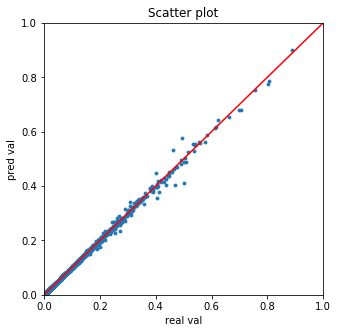

0.9990441828041772

In [397]:
scatter_plot(y_val, pre, 8)
r2_score(y_val, pre)

/Users/shiyuliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9933036141105975

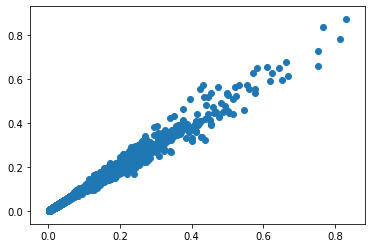

In [127]:
# from sklearn.ensemble import RandomForestRegressor
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train, y_train)
# y_pred = rf_model.predict(X_test)
# plt.scatter(y_test, y_pred)
# r2_score(y_test, y_pred)

## Data Leakage version

In [136]:
df = pd.read_csv("Joined_Melt_Pool.csv", index_col=False)
df.drop(columns=["Unnamed: 0"], inplace=True)
X = df.drop(columns=["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"])
y = df[["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"]]

In [143]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [146]:
y_train_length = y_train["Melt_Pool_Length"]
y_train_width = y_train["Melt_Pool_Width"]
y_train_depth = y_train["Melt_Pool_Depth"]

y_val_length = y_val["Melt_Pool_Length"]
y_val_width = y_val["Melt_Pool_Width"]
y_val_depth = y_val["Melt_Pool_Depth"]

rf_length_model = RandomForestRegressor()
rf_width_model = RandomForestRegressor()
rf_depth_model = RandomForestRegressor()

rf_length_model.fit(X_train, y_train_length)
y_pred_length = rf_length_model.predict(X_val)

rf_width_model.fit(X_train, y_train_width)
y_pred_width = rf_width_model.predict(X_val)

rf_depth_model.fit(X_train, y_train_depth)
y_pred_depth= rf_depth_model.predict(X_val)

/Users/shiyuliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shiyuliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shiyuliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [152]:
rf_depth_model.fit(X_train, y_train_depth)
y_pred_depth= rf_depth_model.predict(X_val)

0.9999998891114567

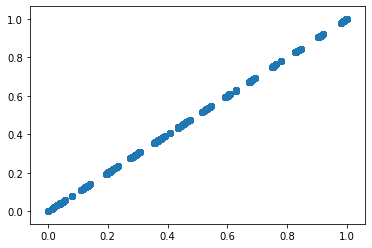

In [147]:
plt.scatter(y_val_length, y_pred_length)
r2_score(y_val_length, y_pred_length)

1.0

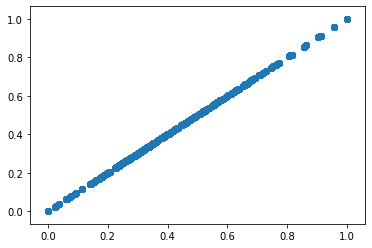

In [154]:
plt.scatter(y_val_width, y_pred_width)
r2_score(y_val_width, y_pred_width)

1.0

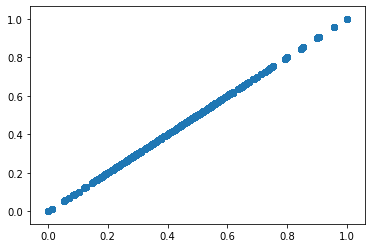

In [153]:
plt.scatter(y_val_depth, y_pred_depth)
r2_score(y_val_depth, y_pred_depth)

## NON-Leakage version

In [162]:
df_cv.head()

,X_Coord,Y_Coord,Z_Coord,Temp,Laser_Speed,Laser_Power,Melt_Pool_Length,Melt_Pool_Width,Melt_Pool_Depth
0,0.18,-0.21,0.0,0.00009,0.65,250,0.5172,0.6458,0.6286
1,0.15,-0.21,0.0,0.00009,0.65,250,0.5172,0.6458,0.6286
2,0.12,-0.21,0.0,0.00010,0.65,250,0.5172,0.6458,0.6286
3,0.09,-0.21,0.0,0.00011,0.65,250,0.5172,0.6458,0.6286
4,0.06,-0.21,0.0,0.00015,0.65,250,0.5172,0.6458,0.6286


In [416]:
df_train = pd.read_csv("Joined_Melt_Pool.csv", index_col=False)
df_train.drop(columns=["Unnamed: 0"], inplace=True)
df_cv = pd.read_csv("Joined_Melt_Pool_cv.csv", index_col=False)
df_cv.drop(columns=["Unnamed: 0"], inplace=True)
df_cv.head()

X_train = df_train.drop(columns=["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"])
y_train = df_train[["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"]]

X_val = df_cv.drop(columns=["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"])
y_val = df_cv[["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"]]

In [417]:
y_train_length = y_train["Melt_Pool_Length"]
y_train_width = y_train["Melt_Pool_Width"]
y_train_depth = y_train["Melt_Pool_Depth"]

y_val_length = y_val["Melt_Pool_Length"]
y_val_width = y_val["Melt_Pool_Width"]
y_val_depth = y_val["Melt_Pool_Depth"]

rf_length_model = CatBoostRegressor(iterations=600,
                                        learning_rate=0.1,
                                        depth=12, 
                                        logging_level="Silent")
rf_width_model = CatBoostRegressor(iterations=600,
                                        learning_rate=0.1,
                                        depth=8, 
                                        logging_level="Silent")
rf_depth_model = CatBoostRegressor(iterations=600,
                                        learning_rate=0.1,
                                        depth=8, 
                                        logging_level="Silent")


In [ ]:
import pickle
filename = 'cat_1b_length.sav'
pickle.dump(rf_length_model, open(filename, 'wb'))

### Length Model

min =  0.0
max =  1.0


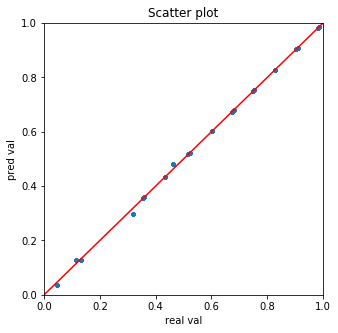

0.9992951023403244

In [418]:
rf_length_model.fit(X_train, y_train_length)
y_pred_length = rf_length_model.predict(X_val)
scatter_plot(y_val_length, y_pred_length, 10)
r2_score(y_val_length, y_pred_length)

### Width

min =  0.0
max =  1.0


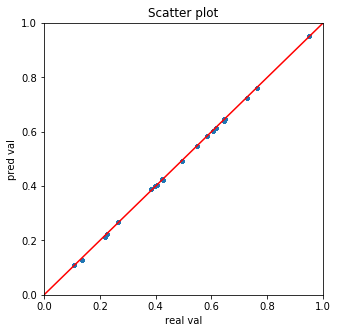

0.999851653311943

In [401]:
rf_width_model.fit(X_train, y_train_width)
y_pred_width = rf_width_model.predict(X_val)

scatter_plot(y_val_width, y_pred_width, 10)
r2_score(y_val_width, y_pred_width)

In [355]:
import pickle
filename = 'cat_1b_width.sav'
pickle.dump(rf_width_model, open(filename, 'wb'))

### Depth

min =  0.0
max =  1.0


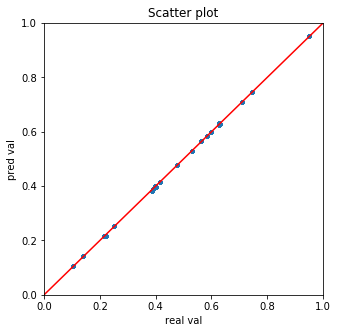

0.9998264428498155

In [402]:
rf_depth_model.fit(X_train, y_train_depth)
y_pred_depth= rf_depth_model.predict(X_val)

scatter_plot(y_val_depth, y_pred_depth, 10)
r2_score(y_val_depth, y_pred_depth)

In [356]:
import pickle
filename = 'cat_1b_depth.sav'
pickle.dump(rf_depth_model, open(filename, 'wb'))

In [210]:
def run_cat(X_train, y_train, X_test, y_test):
    cat_model = CatBoostRegressor(iterations=600,
                                        learning_rate=0.1,
                                        depth=10, 
                                        logging_level="Silent")
    
    cat_model.fit(X_train, y_train)
    y_pred = cat_model.predict(X_test)
    plt.scatter(y_test, y_pred)
    plt.show()
    r2 = r2_score(y_test, y_pred)
    print("R2:", r2)
    return cat_model, r2

# Task 2

In [215]:
df2_train = pd.read_csv("random_samples_temp_50.csv", index_col=False)

In [216]:
df2_train.drop(columns=["Unnamed: 0"], inplace=True)
df2_train.head()

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
0,0.176231,-0.200626,0.00,0.0658,-1,0.00091,200.0,0.6,70
1,0.176231,-0.200626,-0.03,0.0658,-1,0.00088,200.0,0.6,70
2,0.176231,-0.200626,-0.06,0.0658,-1,0.00078,200.0,0.6,70
3,0.176231,-0.200626,-0.09,0.0658,-1,0.00072,200.0,0.6,70
4,0.176231,-0.200626,-0.12,0.0658,-1,0.00068,200.0,0.6,70


In [217]:
X = df2_train.drop(columns=["Temp"])
y = df2_train["Temp"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [218]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(2586176, 8) (862059, 8) (2586176,) (862059,)


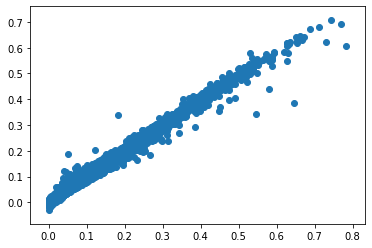

R2: 0.9939780857034547


(<catboost.core.CatBoostRegressor at 0x1a1b204b90>, 0.9939780857034547)

In [211]:
run_cat(X_train, y_train, X_val, y_val)

In [212]:
model = CatBoostRegressor(iterations=600,
                            learning_rate=0.1,
                            depth=12, 
                            logging_level="Silent")
model.fit(X_train, y_train)
pre = model.predict(X_val)

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'

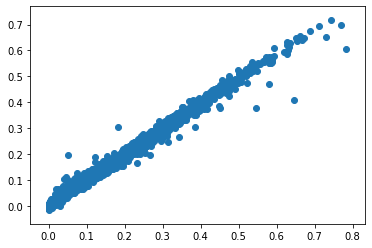

0.9960940156791467

In [214]:
plt.scatter(y_val, pre)
plt.show()
r2_score(y_val, pre)

## 50 train 10 val

In [312]:
df2_train = pd.read_csv("random_samples_temp_200.csv", index_col=False)
df2_val = pd.read_csv("random_samples_temp_50.csv", index_col=False)

In [313]:
df2_train.drop(columns=["Unnamed: 0"], inplace=True)
df2_train.head()

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
0,0.170365,-0.209347,0.00,0.0642,-1,0.00076,100.0,0.6,10
1,0.170365,-0.209347,-0.03,0.0642,-1,0.00074,100.0,0.6,10
2,0.170365,-0.209347,-0.06,0.0642,-1,0.00070,100.0,0.6,10
3,0.170365,-0.209347,-0.09,0.0642,-1,0.00067,100.0,0.6,10
4,0.170365,-0.209347,-0.12,0.0642,-1,0.00065,100.0,0.6,10


In [314]:
df2_val.drop(columns=["Unnamed: 0"], inplace=True)
df2_val.head()

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
0,0.176231,-0.200626,0.00,0.0658,-1,0.00091,200.0,0.6,70
1,0.176231,-0.200626,-0.03,0.0658,-1,0.00088,200.0,0.6,70
2,0.176231,-0.200626,-0.06,0.0658,-1,0.00078,200.0,0.6,70
3,0.176231,-0.200626,-0.09,0.0658,-1,0.00072,200.0,0.6,70
4,0.176231,-0.200626,-0.12,0.0658,-1,0.00068,200.0,0.6,70


In [315]:
print(df2_train.shape, df2_val.shape)

(12544154, 9) (3448235, 9)


In [316]:
X_train = df2_train.drop(columns=["Temp"])
y_train = df2_train["Temp"]

X_val = df2_val.drop(columns=["Temp"])
y_val = df2_val["Temp"]

print(df2_train.shape, df2_val.shape)

(12544154, 9) (3448235, 9)


In [317]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(12544154, 8) (3448235, 8) (12544154,) (3448235,)


In [318]:
model = CatBoostRegressor(iterations=900,
                            learning_rate=0.07,
                            depth=14, 
                            logging_level="Silent")
model.fit(X_train, y_train)
pre = model.predict(X_val)

min =  -0.036946540154875765
max =  1.0


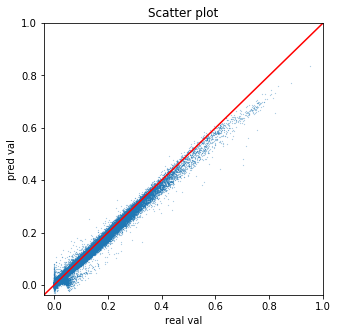

0.9922857772200838

In [319]:
scatter_plot(y_val, pre)
r2_score(y_val, pre)

In [323]:
import pickle
filename = 'cat_900_0.07_14.sav'
pickle.dump(model, open(filename, 'wb'))

In [271]:
import pickle
filename = 'cat_800_0.07_14.sav'
pickle.dump(model, open(filename, 'wb'))

In [255]:
import pickle
filename = 'cat_800_0.07_12.sav'
pickle.dump(model, open(filename, 'wb'))

In [256]:
loaded_model = pickle.load(open("cat_800_0.07_12.sav", 'rb'))

In [379]:
def scatter_plot(arX, arY, size):
    loLineStart = min(0.0, arX.min(), arY.min())
    loLineEnd = max(1.0, arX.max(), arY.max())

    print("min = ", loLineStart)
    print("max = ", loLineEnd)

    plt.figure(figsize=(5,5))
    plt.scatter(arX, arY, s=size)
    plt.plot([loLineStart, loLineEnd], [loLineStart, loLineEnd], 'k-', color='r')
    plt.title('Scatter plot')
    plt.xlabel('real val')
    plt.ylabel('pred val')


    plt.xlim(loLineStart, loLineEnd)
    plt.ylim(loLineStart, loLineEnd)

    plt.show()

min =  -0.06112625655630948
max =  1.0


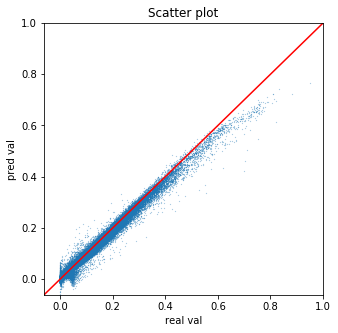

In [268]:
scatter_plot(y_val, pre)

In [ ]:
# TEST ALL TRAINING SAMPLES

In [274]:
df2_600 = pd.read_csv("random_samples_temp_600.csv", index_col=False)
df2_600.drop(columns=["Unnamed: 0"], inplace=True)
df2_600.head()

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
0,0.17,0.20,0.0,0.07,-1,0.01273,125.0,0.6,90
1,0.17,0.17,0.0,0.07,-1,0.02173,125.0,0.6,90
2,0.17,0.14,0.0,0.07,-1,0.03232,125.0,0.6,90
3,0.17,0.11,0.0,0.07,-1,0.04296,125.0,0.6,90
4,0.17,0.08,0.0,0.07,-1,0.04904,125.0,0.6,90


In [275]:
df2_600.shape

(34703410, 9)

In [276]:
X_val = df2_600.drop(columns=["Temp"])
y_val = df2_600["Temp"]

In [277]:
pre = model.predict(X_val)

min =  -0.04020718428022635
max =  1.0


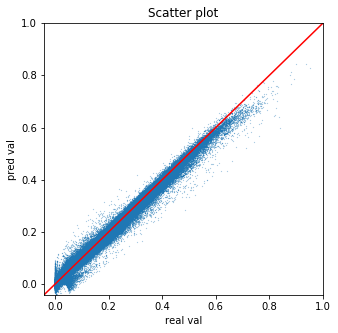

0.9948320085981419

In [278]:
scatter_plot(y_val, pre)
r2_score(y_val, pre)

In [279]:
pre = loaded_model.predict(X_val)

min =  -0.06112625655630948
max =  1.0


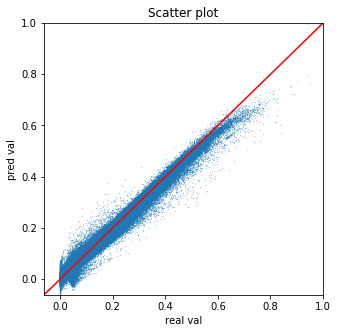

0.992786844385237

In [280]:
scatter_plot(y_val, pre)
r2_score(y_val, pre)

## VALIDATE

In [324]:
df2_cv = pd.read_csv("random_samples_temp_cv.csv", index_col=False)
df2_cv.drop(columns=["Unnamed: 0"], inplace=True)
df2_cv.head()

X_val = df2_cv.drop(columns=["Temp"])
y_val = df2_cv["Temp"]


In [325]:
pre = model.predict(X_val)

min =  -0.0415111859986796
max =  1.0


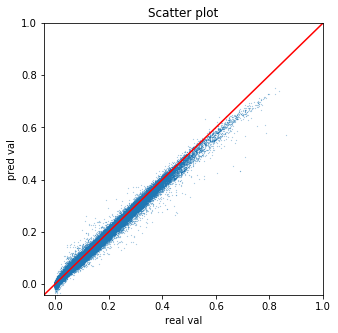

0.9948555783274456

In [328]:
scatter_plot(y_val, pre)
r2_score(y_val, pre)

##########

### Test if laser direction 1 is bad in prediction

In [287]:
df2_cv.head()

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
0,0.176231,-0.200626,0.00,0.0658,-1,0.00074,125.0,0.6,70
1,0.176231,-0.200626,-0.03,0.0658,-1,0.00072,125.0,0.6,70
2,0.176231,-0.200626,-0.06,0.0658,-1,0.00068,125.0,0.6,70
3,0.176231,-0.200626,-0.09,0.0658,-1,0.00066,125.0,0.6,70
4,0.176231,-0.200626,-0.12,0.0658,-1,0.00064,125.0,0.6,70


In [307]:
df2_cv_1 = df2_cv.loc[df2_cv['LasPower'] >= 300]

In [308]:
df2_cv_1.head(10)

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
366387,0.17,0.20,0.0,0.07,-1,0.03124,375.0,0.6,90
366388,0.17,0.17,0.0,0.07,-1,0.04675,375.0,0.6,90
366389,0.17,0.14,0.0,0.07,-1,0.06950,375.0,0.6,90
366390,0.17,0.11,0.0,0.07,-1,0.09597,375.0,0.6,90
366391,0.17,0.08,0.0,0.07,-1,0.11683,375.0,0.6,90
366392,0.17,0.05,0.0,0.07,-1,0.12046,375.0,0.6,90
366393,0.17,0.02,0.0,0.07,-1,0.10424,375.0,0.6,90
366394,0.17,-0.01,0.0,0.07,-1,0.07827,375.0,0.6,90
366395,0.17,-0.04,0.0,0.07,-1,0.05394,375.0,0.6,90
366396,0.17,-0.07,0.0,0.07,-1,0.03610,375.0,0.6,90


In [309]:
X_val = df2_cv_1.drop(columns=["Temp"])
y_val = df2_cv_1["Temp"]

In [310]:
pre = model.predict(X_val)

min =  -0.04443321396207194
max =  1.0


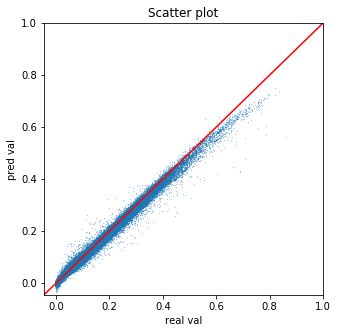

0.9939406019463627

In [311]:
scatter_plot(y_val, pre)
r2_score(y_val, pre)

### Bootstrap

In [372]:
df2_200 = pd.read_csv("random_samples_temp_200.csv", index_col=False)
df2_200.drop(columns=["Unnamed: 0"], inplace=True)
df2_200.head()
df2_200.shape

(12544154, 9)

In [373]:
df2_200_bs = df2_200.loc[df2_200['Temp'] >= 0.6]
print(df2_200_bs.shape)

df2_200_bs = df2_200_bs.sample(frac=200, replace=True, random_state=42)

print(df2_200_bs.shape)

df2_200 = pd.concat([df2_200, df2_200_bs])
print(df2_200.shape)

(360, 9)
(72000, 9)
(12616154, 9)


In [374]:
X_train = df2_200.drop(columns=["Temp"])
y_train = df2_200["Temp"]

In [380]:
model_bs = CatBoostRegressor(iterations=800,
                            learning_rate=0.1,
                            depth=10, 
                            logging_level="Silent")
model_bs.fit(X_train, y_train)

In [381]:
X_val = df2_cv.drop(columns=["Temp"])
y_val = df2_cv["Temp"]

In [382]:
pre = model_bs.predict(X_val)

min =  -0.08556374096977934
max =  1.0


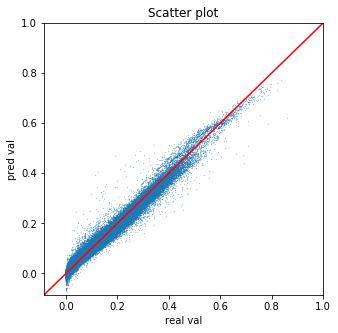

0.98973193281625

In [384]:
scatter_plot(y_val, pre, 0.02)
r2_score(y_val, pre)

In [370]:
import pickle
filename = 'cat_2b_bs1.sav'
pickle.dump(model_bs, open(filename, 'wb'))

## 2b

In [557]:
df2b_train = pd.read_csv("Melt_Pool_Dimensions_2b_train.csv", index_col=False)
df2b_val = pd.read_csv("Melt_Pool_Dimensions_2b_CV.csv", index_col=False)
df2b_train.head()

,Laser_Speed,Laser_Power,Edge_Angle,Edge_Distance,Laser_Direction,Melt_Pool_Length,Melt_Pool_Width,Melt_Pool_Depth
0,0.6,100,90,0.10,-1,0.0576,0.3142,0.1141
1,0.6,100,90,0.13,-1,0.0297,0.3349,0.1531
2,0.6,100,90,0.16,-1,0.0295,0.3369,0.1669
3,0.6,100,90,0.19,-1,0.0492,0.3352,0.1769
4,0.6,100,90,0.22,-1,0.0683,0.3296,0.1761


In [555]:
X_train = df2b_train.drop(columns=["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"])
y_train = df2b_train[["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"]]

X_val = df2b_val.drop(columns=["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"])
y_val = df2b_val[["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"]]

y_train_length = y_train["Melt_Pool_Length"]
y_train_width = y_train["Melt_Pool_Width"]
y_train_depth = y_train["Melt_Pool_Depth"]

y_val_length = y_val["Melt_Pool_Length"]
y_val_width = y_val["Melt_Pool_Width"]
y_val_depth = y_val["Melt_Pool_Depth"]

In [563]:
x = pd.read_csv("Melt_Pool_Dimensions_2b_train.csv", index_col=False)

x = x.assign(volumn=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**3)
x = x.assign(surface=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**2)
x = x.assign(distance=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**1)
x = x.assign(sin=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi))

x1 = x[(x.Edge_Angle==70)|(x.Laser_Speed==0.9)|(x.Laser_Power==150)]
x2 = x[(x.Edge_Angle!=70)&(x.Laser_Speed!=0.9)&(x.Laser_Power!=150)]


X_train = x2.drop(columns=["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"])
y_train = x2[["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"]]

X_val = x1.drop(columns=["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"])
y_val = x1[["Melt_Pool_Length","Melt_Pool_Width","Melt_Pool_Depth"]]

y_train_length = y_train["Melt_Pool_Length"]
y_train_width = y_train["Melt_Pool_Width"]
y_train_depth = y_train["Melt_Pool_Depth"]

y_val_length = y_val["Melt_Pool_Length"]
y_val_width = y_val["Melt_Pool_Width"]
y_val_depth = y_val["Melt_Pool_Depth"]


In [564]:
rf_length_model2 = CatBoostRegressor(iterations=1200,
                                        learning_rate=0.06,
                                        depth=10, 
                                        logging_level="Silent")
rf_width_model2 = CatBoostRegressor(iterations=1200,
                                        learning_rate=0.1,
                                        depth=12, 
                                        logging_level="Silent")
rf_depth_model2 = CatBoostRegressor(iterations=1000,
                                        learning_rate=0.07,
                                        depth=8, 
                                        logging_level="Silent")

min =  0.0
max =  1.0


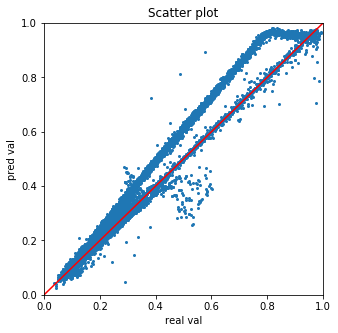

0.9001879838296852

In [560]:
rf_length_model2.fit(X_train, y_train_length)
y_pred_length = rf_length_model2.predict(X_val)
scatter_plot(y_val_length, y_pred_length,4)
r2_score(y_val_length, y_pred_length)

min =  0.0
max =  1.0


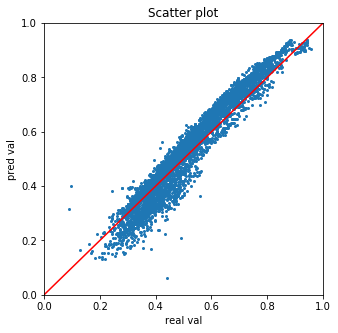

0.8777489528230189

In [561]:
rf_width_model2.fit(X_train, y_train_width)
y_pred_width = rf_width_model2.predict(X_val)
scatter_plot(y_val_width, y_pred_width, 4)
r2_score(y_val_width, y_pred_width)

min =  0.0
max =  1.0


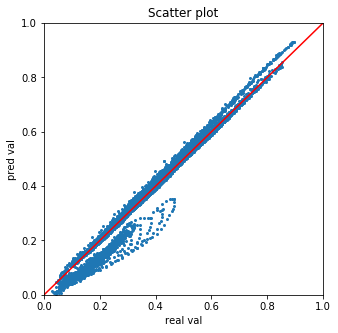

0.9684804853835859

In [565]:
rf_depth_model2.fit(X_train, y_train_depth)
y_pred_depth= rf_depth_model2.predict(X_val)
scatter_plot(y_val_depth, y_pred_depth, 4)
r2_score(y_val_depth, y_pred_depth)

In [479]:
import pickle
filename = 'cat_2b_length.sav'
pickle.dump(rf_length_model2, open(filename, 'wb'))

filename = 'cat_2b_width.sav'
pickle.dump(rf_width_model2, open(filename, 'wb'))

filename = 'cat_2b_depth.sav'
pickle.dump(rf_depth_model2, open(filename, 'wb'))

In [552]:
X_2_test = pd.read_csv("Melt_Pool_Dimensions_test.csv")

X_2_test = X_2_test.assign(volumn=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**3)
X_2_test = X_2_test.assign(surface=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**2)
X_2_test = X_2_test.assign(distance=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**1)
X_2_test = X_2_test.assign(sin=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi))


rf_length_model2.fit(X_train, y_train_length)
rf_width_model2.fit(X_train, y_train_width)
rf_depth_model2.fit(X_train, y_train_depth)

y_2_test_pred_depth = rf_depth_model2.predict(X_2_test)
y_2_test_pred_width = rf_width_model2.predict(X_2_test)
y_2_test_pred_length = rf_length_model2.predict(X_2_test)

In [487]:
y_2_test_pred_width .shape

(2676,)

In [554]:
X_2_test["Melt_Pool_Length"] = y_2_test_pred_length
X_2_test["Melt_Pool_Width"] = y_2_test_pred_width
X_2_test["Melt_Pool_Depth"] = y_2_test_pred_depth
X_2_test.to_csv("Melt_Pool_Dimensions_test_1.csv", index=False)